In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:85% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="red">03. 비지도학습 군집화</font></b>
# 1. 데이터 생성
- 남, 여 키와 몸무게 데이터를 군집화

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
random.randint(140, 195)

177

In [19]:
data = []
for i in range(50):
    # 여자 데이터 data 추가
    data.append([random.randint(40, 70), random.randint(150, 175)])
    # 남자 데이터 data 추가
    data.append([random.randint(55, 85), random.randint(160, 185)])
# data

In [23]:
# 여자
# for female in data[::2]:
#     print(female, end=' ')
print('여자 :', [female for female in data[::2]])
print('남자 :', [male for male in data[1::2]])
print('====================================================')
print('여자 몸무게(x축) :', [female[0] for female in data[::2]])
print('여자 키(y축) :', [female[1] for female in data[::2]])
print('남자 몸무게(x축 ):', [male[0] for male in data[1::2]])
print('남자 키(y축 ):', [male[1] for male in data[1::2]])

여자 : [[45, 152], [56, 175], [42, 168], [59, 172], [51, 171], [57, 166], [65, 157], [57, 170], [48, 155], [47, 172], [57, 165], [40, 172], [46, 163], [67, 165], [61, 156], [58, 164], [42, 163], [46, 170], [69, 150], [55, 160], [56, 164], [66, 154], [62, 167], [62, 170], [64, 158], [46, 150], [63, 172], [68, 172], [41, 162], [47, 173], [47, 152], [67, 162], [58, 153], [61, 155], [53, 167], [63, 173], [60, 166], [57, 153], [64, 163], [40, 150], [61, 154], [51, 175], [44, 160], [41, 158], [70, 170], [51, 159], [49, 158], [69, 154], [49, 151], [52, 159]]
남자 : [[79, 166], [56, 183], [71, 184], [77, 180], [83, 169], [55, 175], [79, 170], [58, 181], [56, 169], [58, 163], [58, 165], [73, 170], [83, 180], [59, 166], [80, 180], [73, 165], [60, 166], [66, 163], [84, 176], [69, 182], [77, 173], [78, 169], [62, 183], [66, 175], [62, 161], [77, 179], [79, 175], [72, 160], [65, 171], [72, 175], [63, 171], [83, 166], [56, 176], [73, 169], [57, 167], [67, 176], [79, 166], [55, 169], [78, 170], [63, 160]

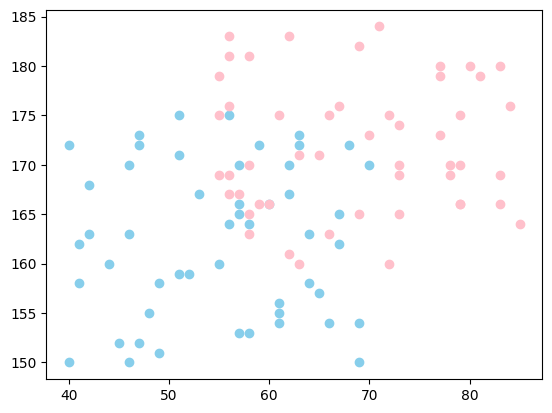

In [29]:
plt.plot([female[0] for female in data[::2]],
         [female[1] for female in data[::2]], 'o', c='skyblue')
plt.plot([male[0] for male in data[1::2]],
         [male[1] for male in data[1::2]], 'o', c='pink')
plt.show()

# 2. 군집화 로직

In [32]:
# 초기 랜덤 지점 2개
random_points = [
    [random.randint(40, 85), random.randint(150, 185)],
    [random.randint(40, 85), random.randint(150, 185)]
]
random_points

[[83, 150], [63, 173]]

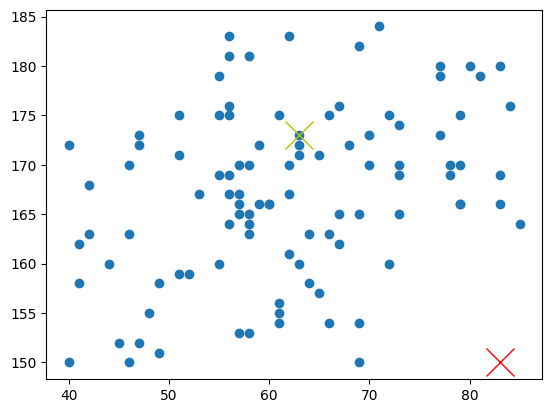

In [37]:
plt.plot([d[0] for d in data],
         [d[1] for d in data], 'o')
plt.plot(random_points[0][0],
        random_points[0][1], 'x', color='r', markersize=20) # 기준점0(random_points[0])
plt.plot(random_points[1][0],
        random_points[1][1], 'x', color='y', markersize=20) # 기준점1(random_points[1])
plt.show()

In [39]:
# 두 점의 거리를 return / a : [x, y]
def dist(a, b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)
dist([0, 0], [3, 4])
print(dist(random_points[0], data[0]))
print(dist(random_points[1], data[0]))

38.05259518088089
27.65863337187866


In [40]:
# random_points[0]에 가까운 그룹과 random_points[1]에 가까윤 그룹을 분류
group0 = []
group1 = []
for d in data:
    if dist(random_points[0], d) < dist(random_points[1], d):
        group0.append(d)
    else:
        group1.append(d)
len(group0), len(group1)

(9, 91)

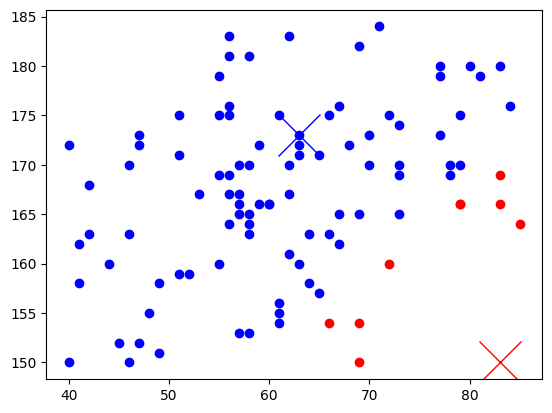

In [43]:
# group0과 group1, 기준점0, 기준점1
plt.plot([d[0] for d in group0],
         [d[1] for d in group0], 'o', c='r')
plt.plot(random_points[0][0],
        random_points[0][1], 'x', c='r', markersize=30)
plt.plot([d[0] for d in group1],
         [d[1] for d in group1], 'o', c='b')
plt.plot(random_points[1][0],
        random_points[1][1], 'x', c='b', markersize=30)
plt.show()

In [47]:
# 기준점 이동 : group0의 중심점(기준점0), group1의 중심점(기준점1)
group0_meanX = np.mean([d[0] for d in group0])
group0_meanY = np.mean([d[1] for d in group0])
random_points[0] = [group0_meanX, group0_meanY]

group1_meanX = np.mean([d[0] for d in group1])
group1_meanY = np.mean([d[1] for d in group1])
random_points[1] = [group1_meanX, group1_meanY]
random_points

[[76.11111111111111, 161.0], [60.32967032967033, 167.71428571428572]]

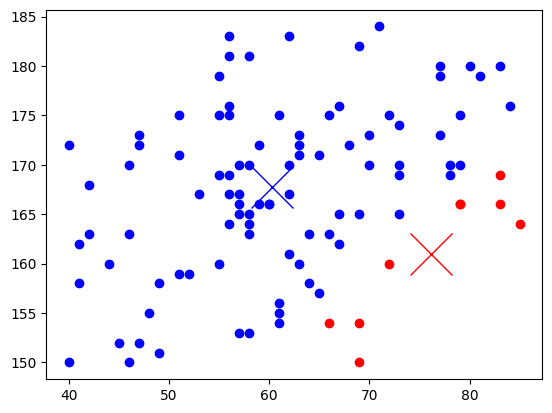

In [48]:
plt.plot([d[0] for d in group0],
         [d[1] for d in group0], 'o', c='r')
plt.plot(random_points[0][0],
        random_points[0][1], 'x', c='r', markersize=30)
plt.plot([d[0] for d in group1],
         [d[1] for d in group1], 'o', c='b')
plt.plot(random_points[1][0],
        random_points[1][1], 'x', c='b', markersize=30)
plt.show()

# 3. 군집화 전체 코드(for문 이용)
- 랜덤 포인트 2개 지정
- 랜덤 포인트 2개 출력 및 시각화(x 마크)
- for문
    * 랜덤 포인드 두 지점 기준으로 group0과 group1을 나눔
    * group0의 중간점과 group1의 중간점을 랜덤 포인트로 업데이트
    * 랜덤 포인드 출력 및 시각화(o 마크)

초기 기준점 : [[67, 179], [40, 154]]
1 번째 points : [[66.29729729729729, 169.8108108108108], [48.80769230769231, 159.42307692307693]]
2 번째 points : [[67.30882352941177, 170.01470588235293], [49.9375, 160.9375]]
3 번째 points : [[68.3225806451613, 170.33870967741936], [51.026315789473685, 161.8421052631579]]
4 번째 points : [[69.01724137931035, 170.5], [51.714285714285715, 162.42857142857142]]
5 번째 points : [[70.11764705882354, 171.37254901960785], [53.04081632653061, 162.6734693877551]]
6 번째 points : [[71.1304347826087, 171.8695652173913], [53.75925925925926, 163.05555555555554]]
7 번째 points : [[71.55813953488372, 172.6046511627907], [54.35087719298246, 162.96491228070175]]
8 번째 points : [[71.55813953488372, 172.6046511627907], [54.35087719298246, 162.96491228070175]]
9 번째 points : [[71.55813953488372, 172.6046511627907], [54.35087719298246, 162.96491228070175]]
최종 기준점 : [[71.55813953488372, 172.6046511627907], [54.35087719298246, 162.96491228070175]]


(150.0, 185.0)

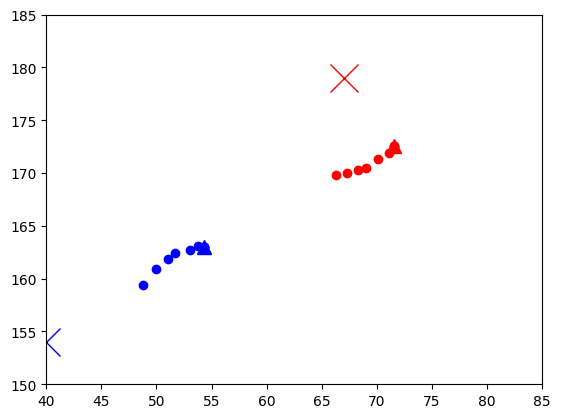

In [58]:
# 랜덤 포인트 2개 지정
points = [
    [random.randint(40, 85), random.randint(150, 185)],
    [random.randint(40, 85), random.randint(150, 185)]
]
print('초기 기준점 :', points)
plt.plot(points[0][0], points[0][1], 'x', c='r', markersize=20)
plt.plot(points[1][0], points[1][1], 'x', c='b', markersize=20)

# for문
for i in range (1, 10):
    # 랜덤 포인드(points) 두 지점 기준으로 group0과 group1을 나눔
    group0 = []
    group1 = []
    for d in data:
        if dist(points[0], d) < dist(points[1], d):
            group0.append(d)
        else:
            group1.append(d)
            
    # group0의 중간점과 group1의 중간점을 랜덤 포인트(points)로 업데이트
    group0_mean_X = np.mean([d[0] for d in group0])
    group0_mean_Y = np.mean([d[1] for d in group0])
    points[0] = [group0_mean_X, group0_mean_Y]
    group1_mean_X = np.mean([d[0] for d in group1])
    group1_mean_Y = np.mean([d[1] for d in group1])
    points[1] = [group1_mean_X, group1_mean_Y]
    
    # 랜덤 포인드(points) 출력
    print(i, '번째 points :', points)
    plt.plot(points[0][0], points[0][1], 'o', c='r')
    plt.plot(points[1][0], points[1][1], 'o', c='b')
print('최종 기준점 :', points)
plt.plot(points[0][0], points[0][1], '^', c='r', markersize=10)
plt.plot(points[1][0], points[1][1], '^', c='b', markersize=10)
plt.xlim([40, 85])
plt.ylim([150, 185])

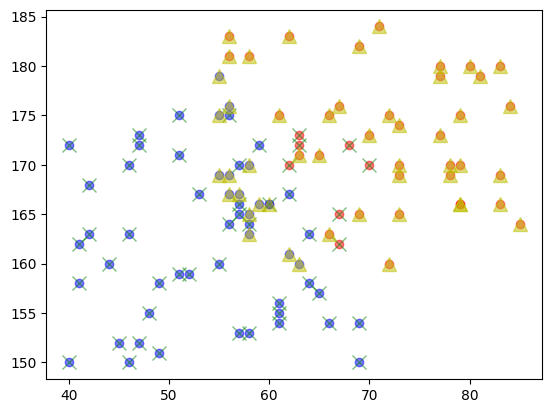

In [66]:
plt.plot([d[0] for d in group0],
         [d[1] for d in group0], 'o', c='r', alpha=0.5)
plt.plot([d[0] for d in group1],
         [d[1] for d in group1], 'o', c='b', alpha=0.5)
plt.plot([d[0] for d in data[::2]],
         [d[1] for d in data[::2]], 'x', c='g', alpha=0.5, markersize=10)
plt.plot([d[0] for d in data[1::2]],
         [d[1] for d in data[1::2]], '^', c='y', alpha=0.5, markersize=10)    
plt.show()

# 4. api(sklearn) 를 이용한 군집화
- sklearn : 머신러닝 패키지 
    * 예측모델 : 지도학습(분류, 회귀), 비지도학습(군집분석) - fit(학습- 모두에게 공통), predict(예측-분류/회귀))
    * 변환모델 : 전처리 시 사용 ex. 스케일 조정 - fit(학습), transform(변환), fit_transform(학>변, ex. LabelEncoder) 

In [69]:
# 군집분석 라이브러리가 경고 메세지(joblib 충돌)를 출력할 경우
# import os
# os.environ['OMP_NUM_THREADS'] = '1'

In [73]:
from sklearn.cluster import KMeans # class
data = np.array(data)
model = KMeans(n_clusters=2, # 2개 그룹으로 군집화
              init='random', # 초기 기준점을 random하게
              n_init=10, # 10번 실행
              random_state=7) # random 결과를 일관되게 맞추기 위한 seed
model.fit(data)

KMeans(init='random', n_clusters=2, n_init=10, random_state=7)

In [74]:
# 기준점(중심점)
model.cluster_centers_

array([[ 74.60606061, 172.45454545],
       [ 55.41791045, 164.47761194]])

In [75]:
#나눠진 그룹들의 인덱스
model.labels_

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1])

In [76]:
group0 = data[model.labels_== 0]
group1 = data[model.labels_== 1]

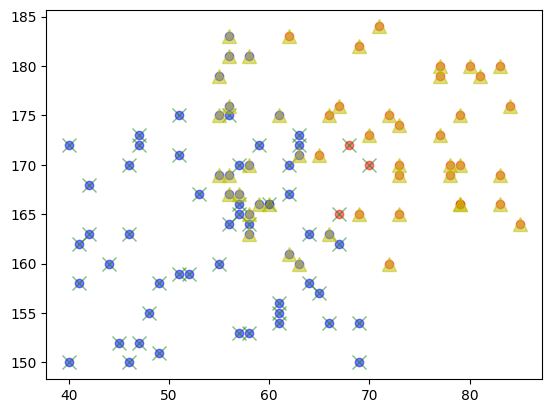

In [77]:
plt.plot([d[0] for d in group0],
         [d[1] for d in group0], 'o', c='r', alpha=0.5)
plt.plot([d[0] for d in group1],
         [d[1] for d in group1], 'o', c='b', alpha=0.5)
plt.plot([d[0] for d in data[::2]],
         [d[1] for d in data[::2]], 'x', c='g', alpha=0.5, markersize=10)
plt.plot([d[0] for d in data[1::2]],
         [d[1] for d in data[1::2]], '^', c='y', alpha=0.5, markersize=10)    
plt.show()